In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

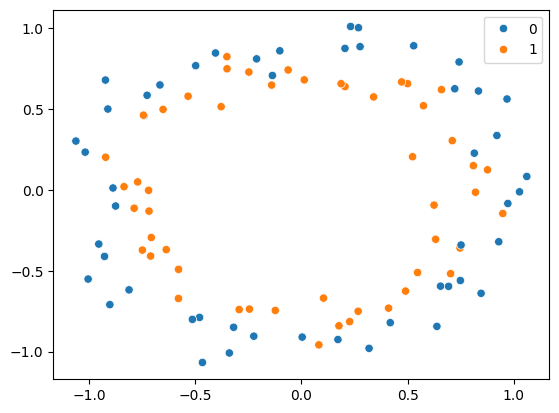

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=3500, validation_data=(X_test, y_test), verbose=0)

<function matplotlib.pyplot.show(close=None, block=None)>

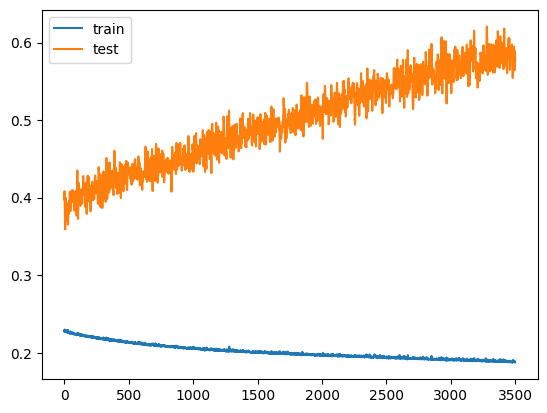

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show

#Early-Stopping

In [13]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
callback = EarlyStopping(monitor='val_loss',
                         min_delta=0.00001,
                         patience=20,
                         verbose=1,
                         mode='auto',
                         baseline=None,
                         restore_best_weights=False
                         )

In [16]:
history = model.fit(X_train, y_train, epochs=3500, validation_data=(X_test, y_test), verbose=0, callbacks=[callback])

Epoch 21: early stopping


<function matplotlib.pyplot.show(close=None, block=None)>

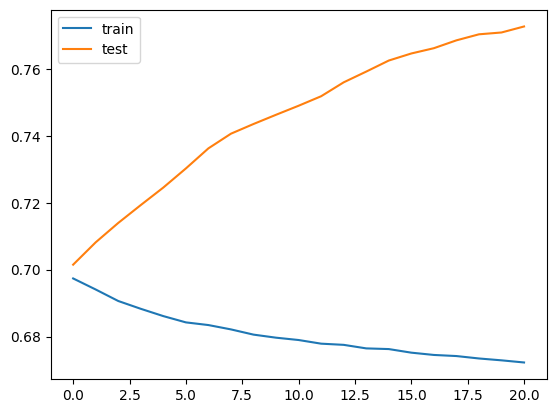

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show